<h3> Stock Analysis</h3>
<h5> Sita Robinson </h5>

Dataset: https://www.kaggle.com/abdullahmu/big-five-stocks/data#

About the dataset: 
Historical NASDAQ stock data for Google, Amazon, Facebook, Apple, and Microsoft from February 1971- August 2019. 

In [280]:
import pandas as pd
import datetime as dt
import mplfinance as mpf
import matplotlib.pyplot as plt

Loading data and setting index column to the date

In [281]:
df=pd.read_csv("big_five_stocks.csv", index_col="Unnamed: 0")

In [282]:
df.shape

(41660, 6)

In [283]:
df.head()

,name,open,close,high,low,volume
1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0
1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0
1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0


Basic Statistics on whole dataframe

In [284]:
df.describe()

,open,close,high,low,volume
count,41660.000000,41660.000000,41660.000000,41660.000000,4.166000e+04
mean,592.565369,592.482337,596.681878,587.823401,1.195606e+07
std,1254.603123,1254.463915,1262.142541,1245.789816,2.156350e+07
min,0.090000,0.090000,0.090000,0.090000,0.000000e+00
25%,16.687500,16.727500,17.060000,16.337500,0.000000e+00
50%,89.255000,89.360000,89.875000,88.615000,2.302950e+06
75%,407.637500,407.775000,409.602500,405.975000,1.401524e+07
max,8325.100000,8330.210000,8339.640000,8291.120000,5.910786e+08


Renaming columns to what is expected in mplfinance package

In [285]:
df=df.rename(columns={"open": "Open", "close": "Close", "high": "High", "low":"Low", "volume": "Volume"})

Checking data types of columns and index

In [286]:
df.dtypes

name       object
Open      float64
Close     float64
High      float64
Low       float64
Volume    float64
dtype: object

In [287]:
df.index.dtype

dtype('O')

Making index into date time object

In [288]:
df.index=pd.to_datetime(df.index)

Company stock names

In [289]:
df['name'].unique()

array(['^IXIC', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB'], dtype=object)

Counting the number of unqiue stock names

In [290]:
df['name'].nunique()

6

Looking at the date range in the dataset

In [291]:
df.index.max()

Timestamp('2019-08-23 00:00:00')

In [292]:
df.index.min()

Timestamp('1971-02-05 00:00:00')

Subsetting df into separate dataframes based on company stock name.

In [293]:
IXIC_stocks=df[df['name']=="^IXIC"]

In [294]:
AAPL_stocks=df[df['name']=="AAPL"]

In [295]:
MSFT_stocks=df[df['name']=="MSFT"]

In [296]:
AMZN_stocks=df[df['name']=="AMZN"]

In [297]:
GOOGL_stocks=df[df['name']=="GOOGL"]

In [298]:
FB_stocks=df[df['name']=="FB"]

<hr>

**Stock Prices Over Time**

Plotting stock prices over time by company

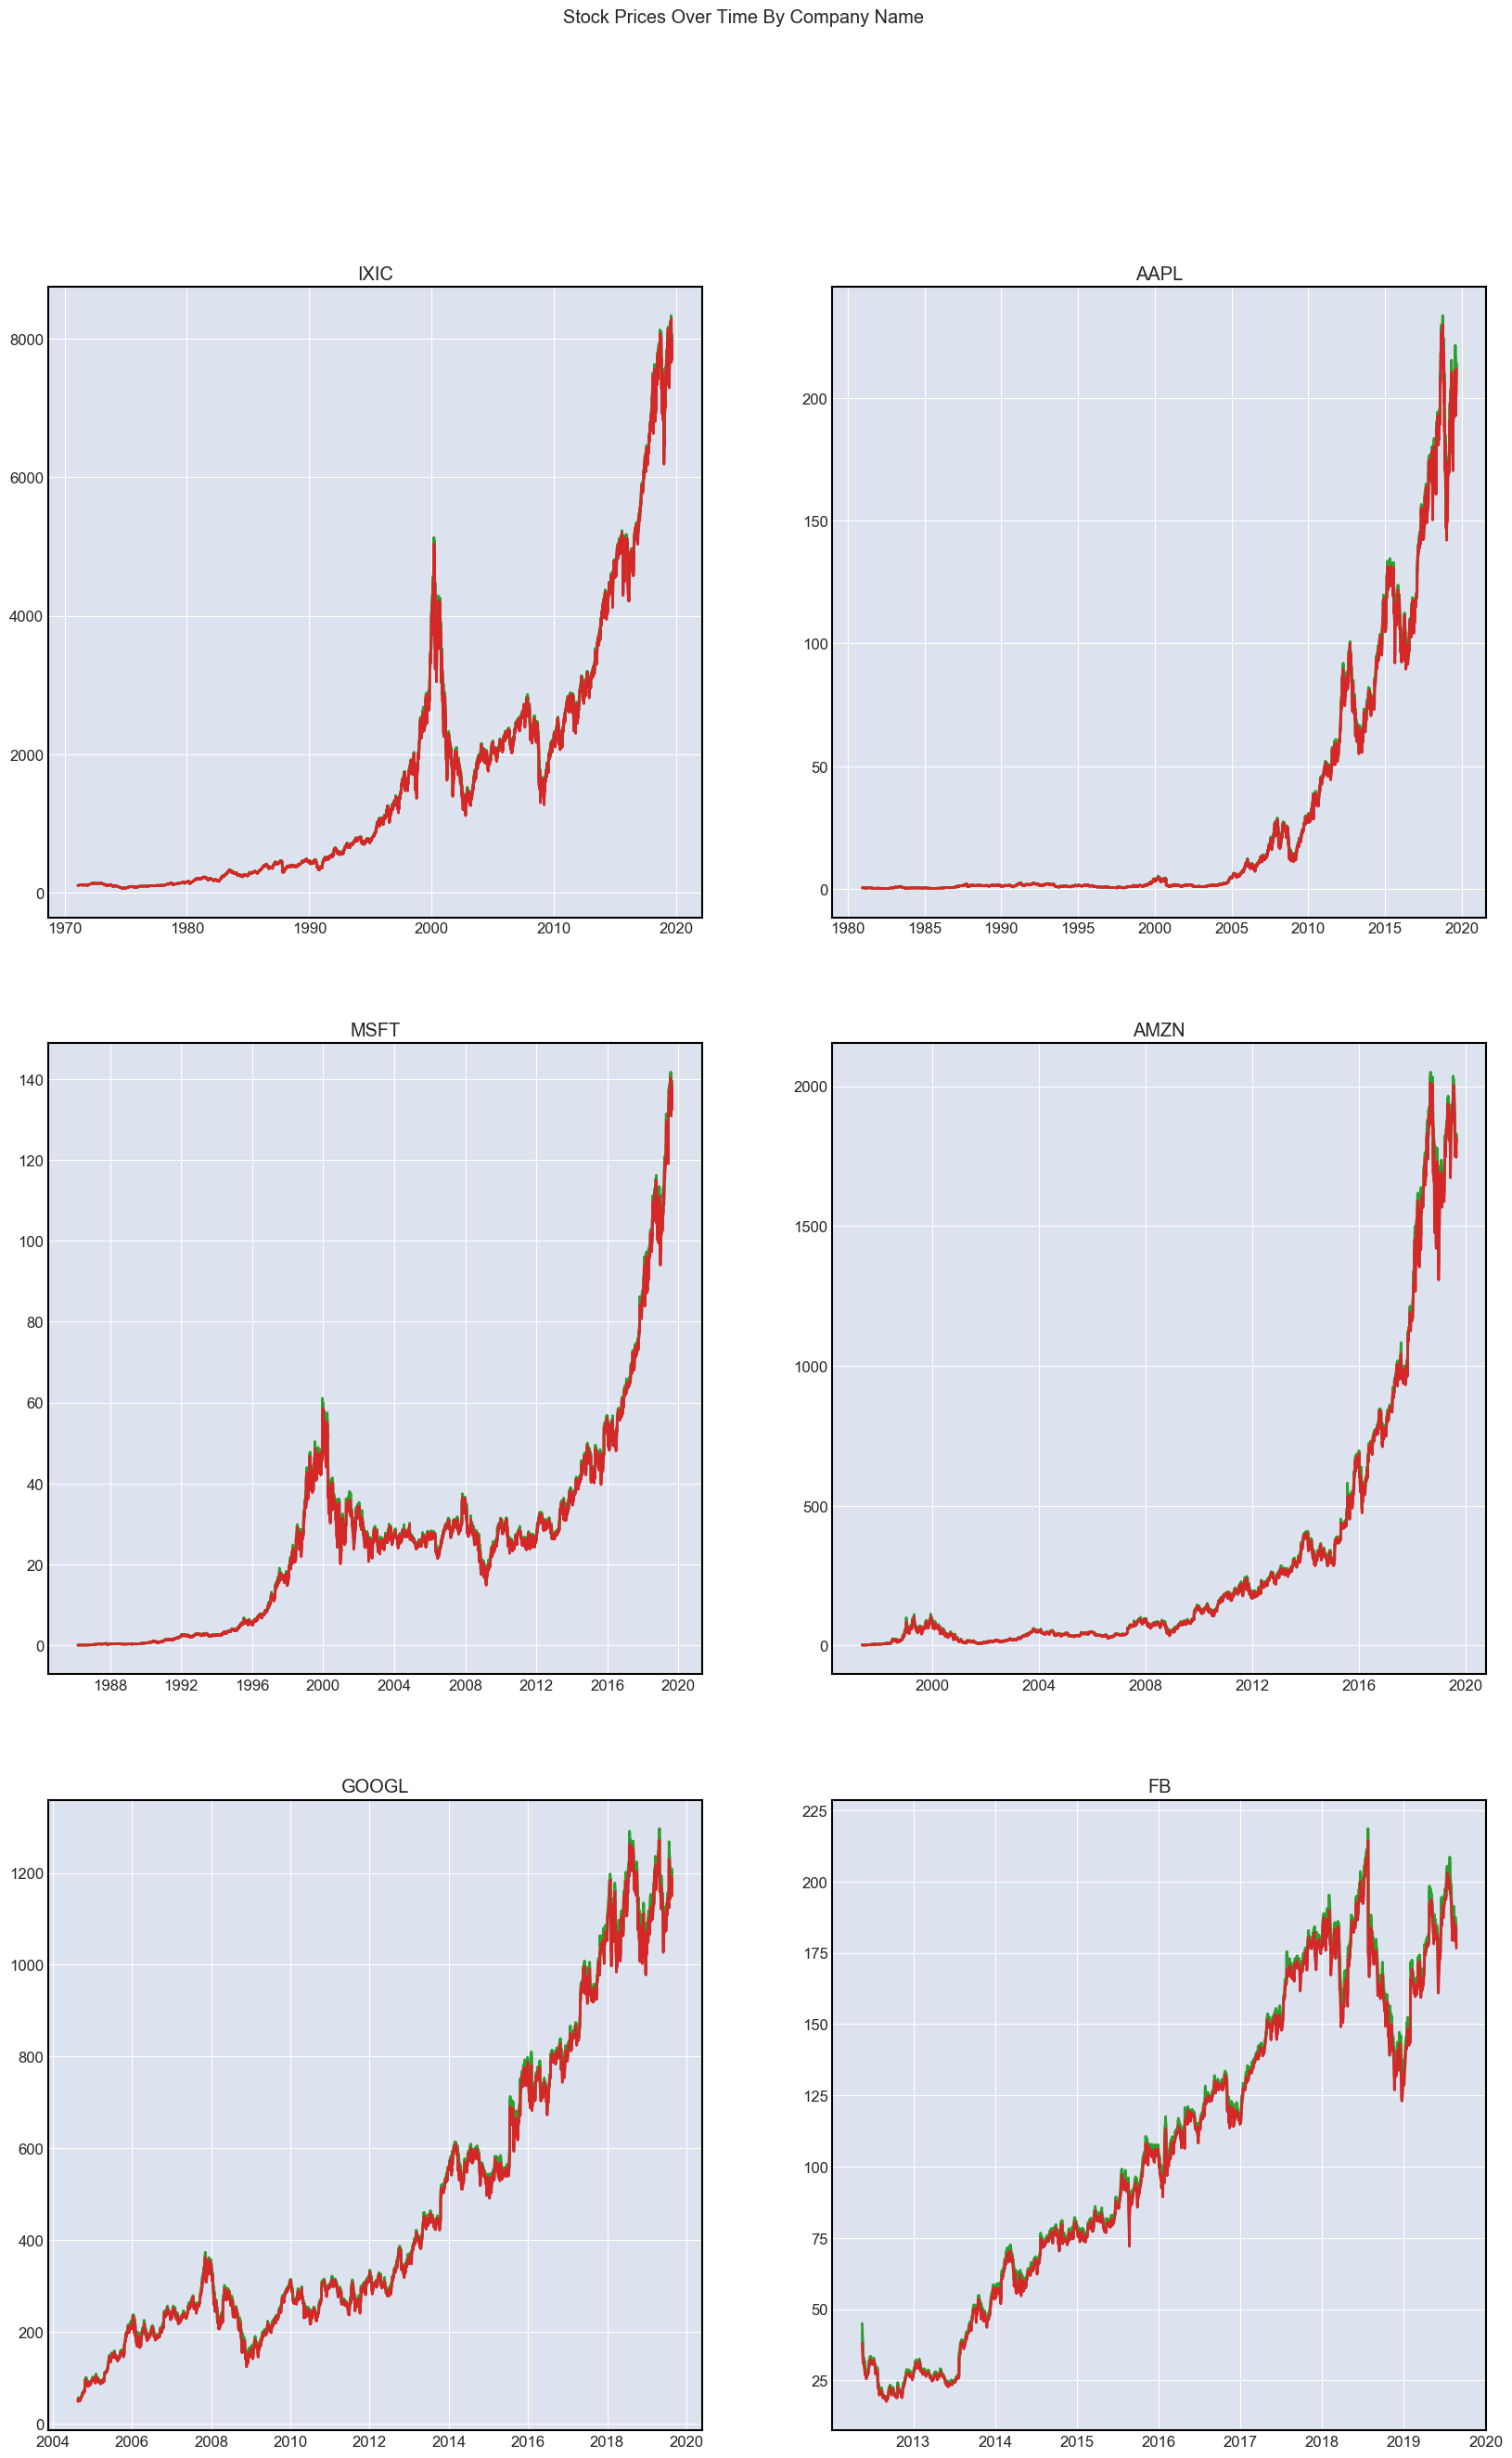

In [313]:
fig = plt.figure(figsize=(20,30))
fig.suptitle("Stock Prices Over Time By Company Name")
plt.subplot(3, 2, 1)
plt.plot(IXIC_stocks[['Open', 'Close', 'High', 'Low']])
plt.title("IXIC")

plt.subplot(3, 2, 2)
plt.plot(AAPL_stocks[['Open', 'Close', 'High', 'Low']])
plt.title("AAPL")

plt.subplot(3, 2, 3)
plt.plot(MSFT_stocks[['Open', 'Close', 'High', 'Low']])
plt.title("MSFT")

plt.subplot(3, 2, 4)
plt.plot(AMZN_stocks[['Open', 'Close', 'High', 'Low']])
plt.title("AMZN")

plt.subplot(3, 2, 5)
plt.plot(GOOGL_stocks[['Open', 'Close', 'High', 'Low']])
plt.title("GOOGL")

plt.subplot(3, 2, 6)
plt.plot(FB_stocks[['Open', 'Close', 'High', 'Low']])
plt.title("FB")
plt.show()

<hr>

**Stock Volume Over Time**

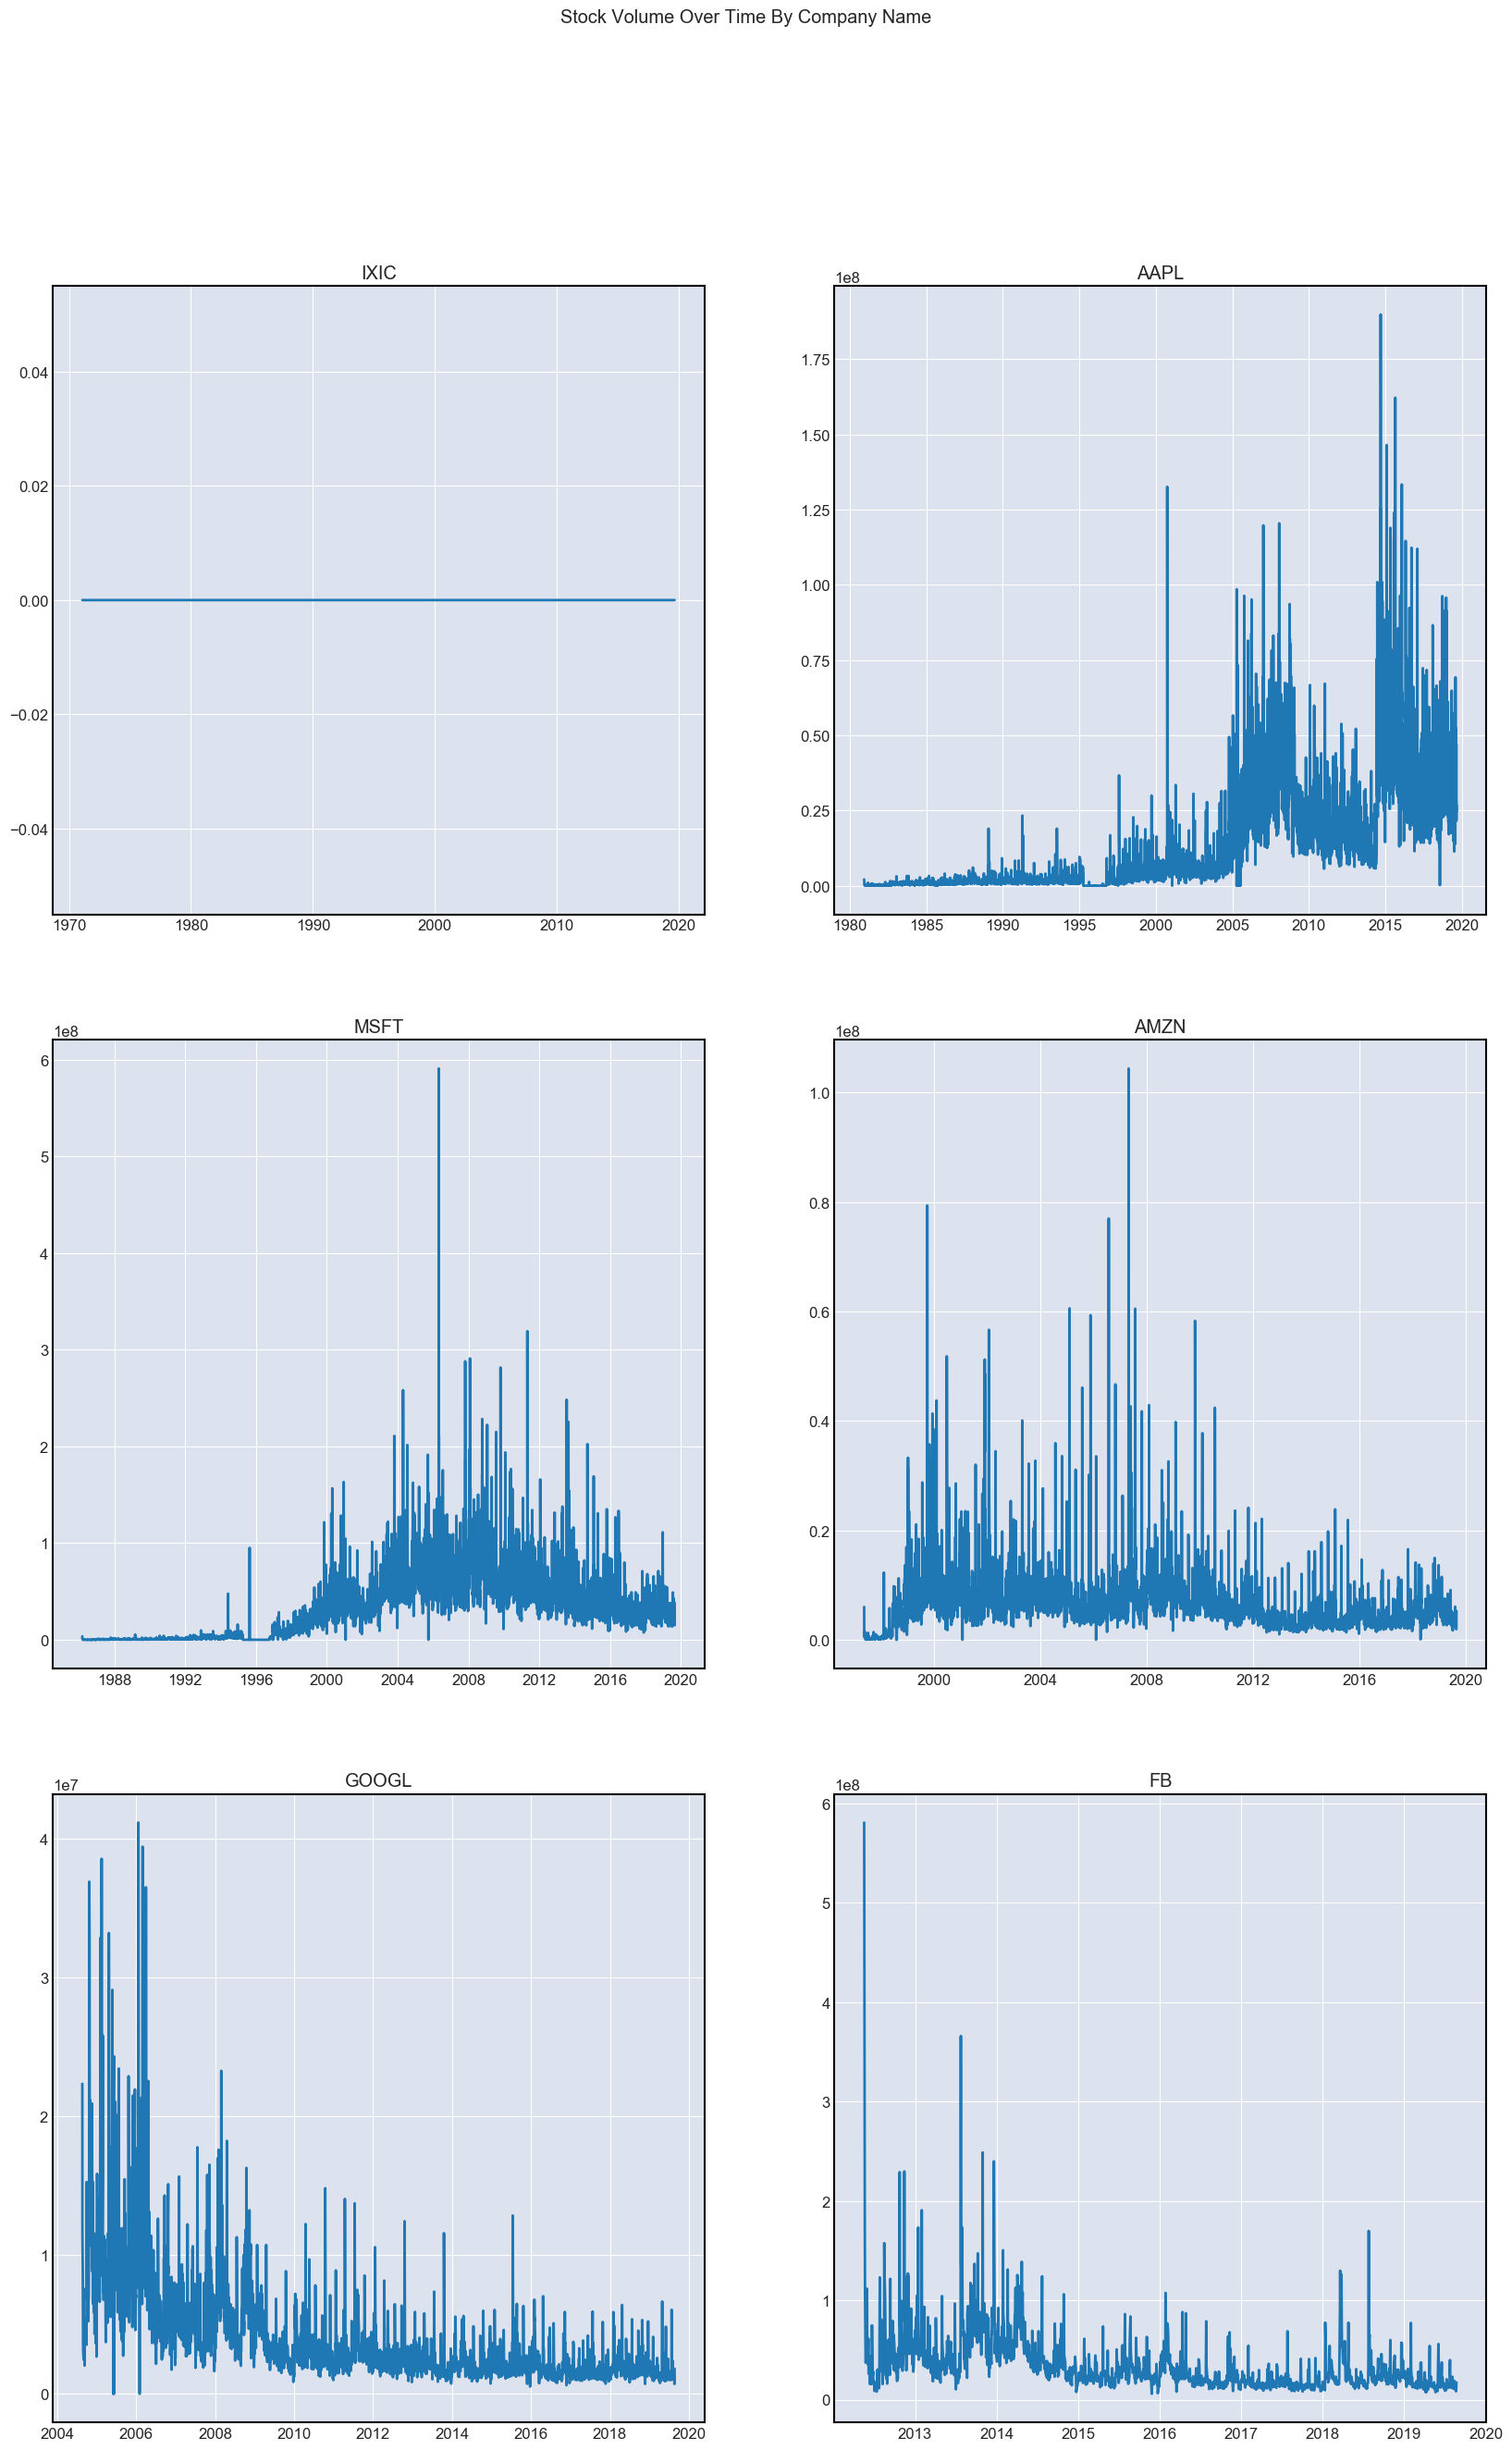

In [300]:
fig = plt.figure(figsize=(20,30))
fig.suptitle("Stock Volume Over Time By Company Name")

plt.subplot(3, 2, 1)
plt.plot(IXIC_stocks['Volume'])
plt.title("IXIC")

plt.subplot(3, 2, 2)
plt.plot(AAPL_stocks['Volume'])
plt.title("AAPL")

plt.subplot(3, 2, 3)
plt.plot(MSFT_stocks[['Volume']])
plt.title("MSFT")

plt.subplot(3, 2, 4)
plt.plot(AMZN_stocks[['Volume']])
plt.title("AMZN")

plt.subplot(3, 2, 5)
plt.plot(GOOGL_stocks[['Volume']])
plt.title("GOOGL")

plt.subplot(3, 2, 6)
plt.plot(FB_stocks[['Volume']])
plt.title("FB")

plt.show()

<hr>

**July 2019 Stocks**

Selecting only stocks falling in July 2019

In [301]:
start = dt.datetime(2019,7,1)
end = dt.datetime(2019,7,30)
July_2019_stocks=df.loc[start:end]

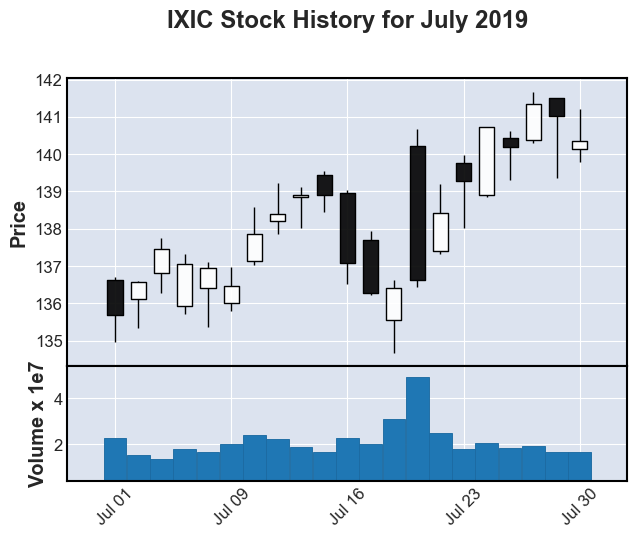

In [302]:
July2019_IXIC_stocks=July_2019_stocks[July_2019_stocks['name']=="IXIC"]
mpf.plot(July2019_MSFT_stocks, type="candlestick", title='IXIC Stock History for July 2019', volume=True)

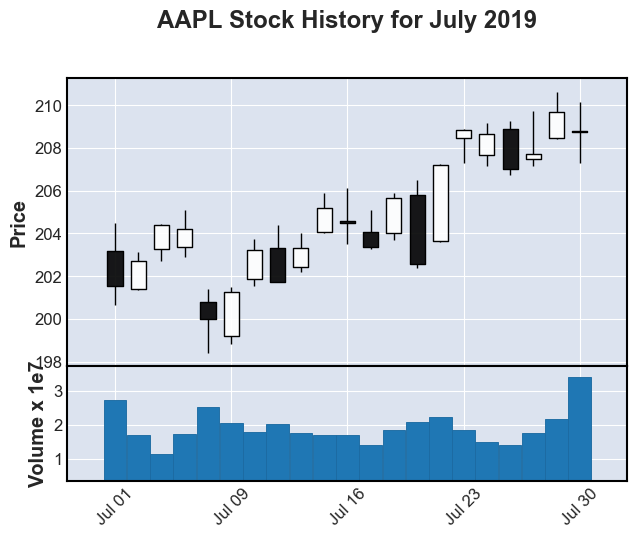

In [303]:
July2019_AAPL_stocks=July_2019_stocks[July_2019_stocks['name']=="AAPL"]
mpf.plot(July2019_AAPL_stocks, type="candlestick", title='AAPL Stock History for July 2019', volume=True)

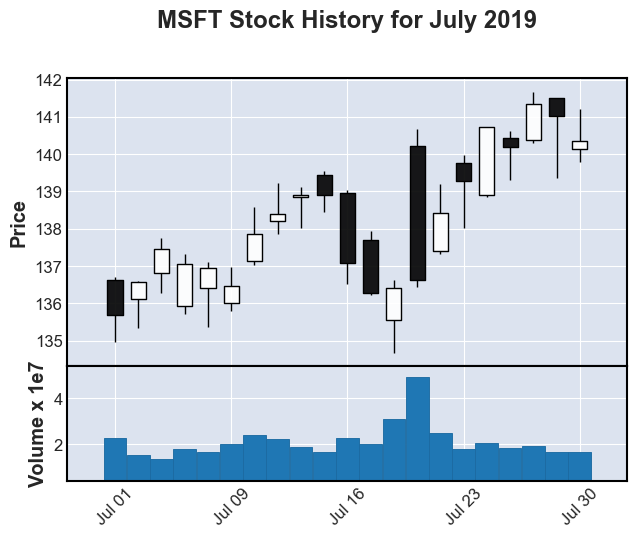

In [304]:
July2019_MSFT_stocks=July_2019_stocks[July_2019_stocks['name']=="MSFT"]
mpf.plot(July2019_MSFT_stocks, type="candlestick", title='MSFT Stock History for July 2019', volume=True)

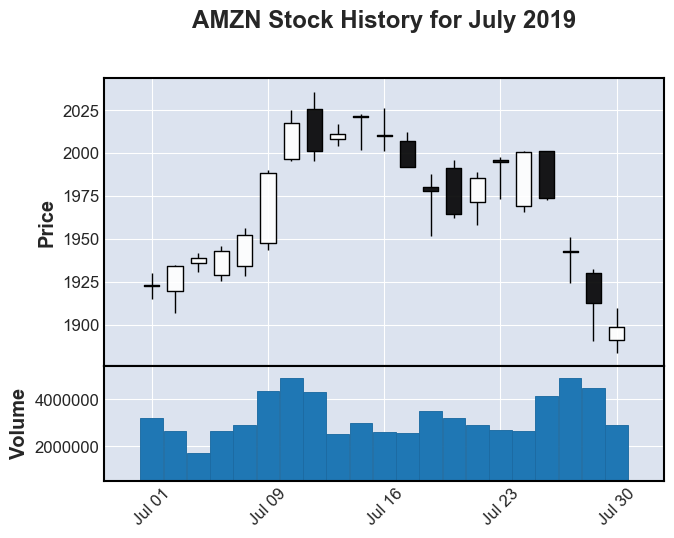

In [305]:
July2019_AMZN_stocks=July_2019_stocks[July_2019_stocks['name']=="AMZN"]
mpf.plot(July2019_AMZN_stocks, type="candlestick", title='AMZN Stock History for July 2019', volume=True)

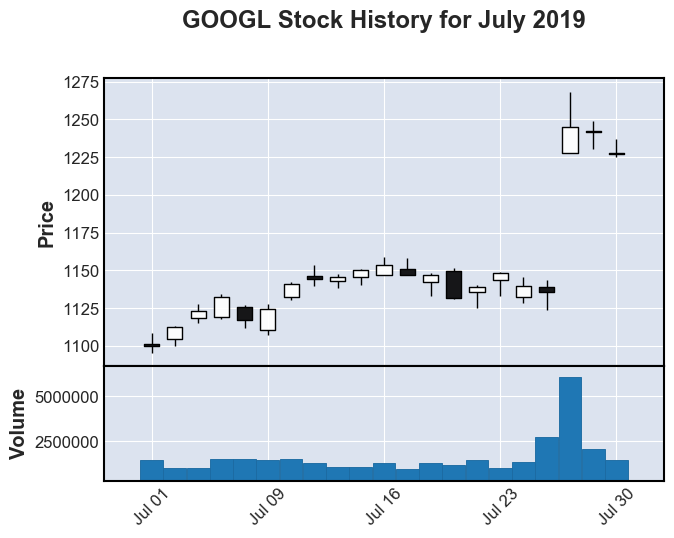

In [306]:
July2019_GOOGL_stocks=July_2019_stocks[July_2019_stocks['name']=="GOOGL"]
mpf.plot(July2019_GOOGL_stocks, type="candlestick", title='GOOGL Stock History for July 2019', volume=True)

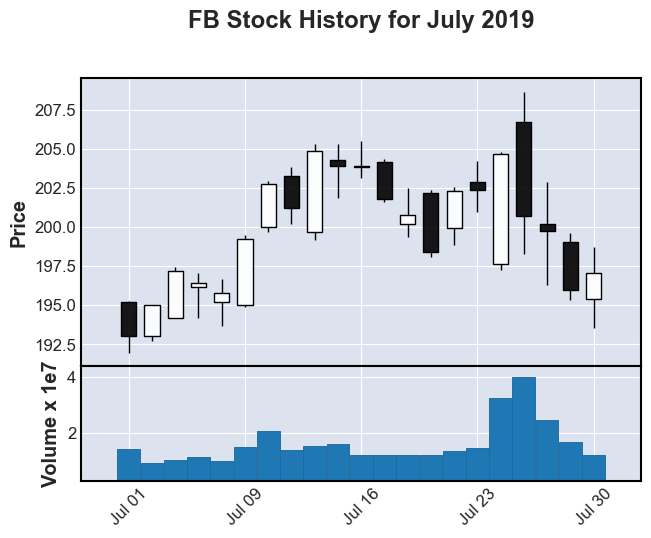

In [307]:
July2019_FB_stocks=July_2019_stocks[July_2019_stocks['name']=="FB"]
mpf.plot(July2019_FB_stocks, type="candlestick", title='FB Stock History for July 2019', volume=True)

**References**

https://github.com/matplotlib/mplfinance

https://www.investopedia.com/trading/candlestick-charting-what-is-it/

https://www.kaggle.com/abdullahmu/big-five-stocks/data#